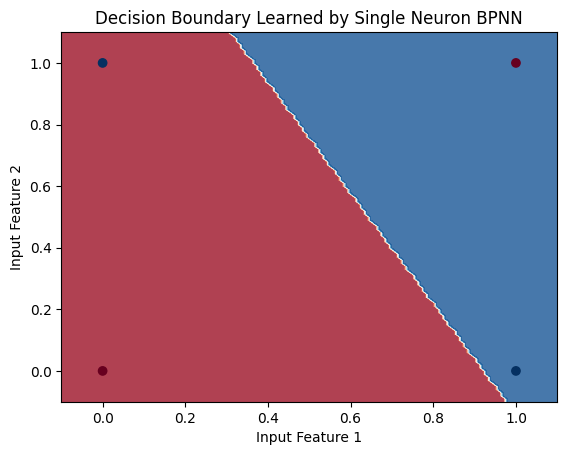

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SingleNeuronBPNN:
    def __init__(self, input_size):
        # Initialize weights and bias randomly
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, X):
        # Calculate the weighted sum of inputs
        z = np.dot(X, self.weights) + self.bias
        # Apply activation function (sigmoid)
        return self.sigmoid(z)

    def backward_pass(self, X, y, y_pred):
        # Calculate the error
        error = y - y_pred
        # Update weights and bias using gradient descent
        d_weights = np.dot(X.T, error * self.sigmoid_derivative(y_pred))
        d_bias = np.sum(error * self.sigmoid_derivative(y_pred))
        self.weights += self.learning_rate * d_weights
        self.bias += self.learning_rate * d_bias

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward_pass(X)
            # Backward pass
            self.backward_pass(X, y, output)

    def predict(self, X):
        return np.round(self.forward_pass(X))


# Define the XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the single neuron BPNN
model = SingleNeuronBPNN(input_size=2)
model.train(X, y, epochs=1000)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.title('Decision Boundary Learned by Single Neuron BPNN')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.show()


In [2]:
'''    Importance of proper initialization of weights in backpropagation:
    Proper initialization of weights is crucial in backpropagation because it affects the convergence and performance of the neural network during training. If the weights are initialized too small, the gradients may vanish during backpropagation, leading to slow convergence or getting stuck in local minima. On the other hand, if the weights are initialized too large, the gradients may explode, causing unstable training and divergence. Proper initialization helps in mitigating these issues and enables more stable and efficient training.

    Common initialization techniques in neural networks and their effects:
        Random Initialization: Initialize weights randomly from a Gaussian or uniform distribution. This approach is simple and widely used but may lead to slow convergence or vanishing/exploding gradients.
        Xavier/Glorot Initialization: Scale weights by the square root of the number of input and output units. It helps in preventing vanishing/exploding gradients, especially in deep networks, by keeping the variance of activations and gradients consistent across layers.
        He Initialization: Similar to Xavier, but scales weights by the square root of the number of input units. It's specifically designed for networks with ReLU activation functions and provides better performance.
        Uniform Initialization: Initialize weights from a uniform distribution. It's less common than Gaussian initialization but can be useful in certain cases.

    Role of activation functions in backpropagation neural networks:
    Activation functions introduce non-linearity to the neural network, allowing it to learn complex patterns and relationships in the data. During forward propagation, activation functions apply a transformation to the weighted sum of inputs, producing the output of each neuron. During backpropagation, they propagate gradients backward through the network, enabling the optimization process by adjusting weights based on the error signal. Common activation functions include sigmoid, tanh, ReLU, and softmax, each suitable for different types of problems and network architectures.

    Main components of the backpropagation algorithm:
        Forward Pass: Calculate the output of the neural network by propagating input data through the network layers.
        Compute Loss: Calculate the difference between the predicted output and the true labels using a loss function.
        Backward Pass (Backpropagation): Propagate the error gradient backward through the network, layer by layer, using the chain rule of calculus to compute gradients of the loss function with respect to each parameter.
        Update Weights: Adjust the weights of the network using an optimization algorithm (e.g., gradient descent) to minimize the loss function.

    Calculating the gradient of the loss function with respect to the weights:
        During backpropagation, the gradient of the loss function with respect to the weights in each layer is computed using the chain rule of calculus.
        The gradient is calculated recursively from the output layer to the input layer, propagating the error gradient backward through the network.
        The gradient of the loss function with respect to the weights in each layer depends on the gradient of the loss function with respect to the activations of the current layer and the activations of the previous layer.

    Purpose of the learning rate in backpropagation and choosing an appropriate learning rate:
        The learning rate controls the size of the steps taken during gradient descent optimization. It determines how much the weights are updated in the direction of the gradient.
        A suitable learning rate is crucial for effective training. If the learning rate is too small, the training process may be slow, while if it's too large, it may lead to unstable training or divergence.
        Common strategies for choosing an appropriate learning rate include using heuristics, such as grid search or random search, cross-validation, or adaptive learning rate methods like AdaGrad, RMSProp, or Adam, which adjust the learning rate dynamically during training based on past gradients.

'''

"    Importance of proper initialization of weights in backpropagation:\n    Proper initialization of weights is crucial in backpropagation because it affects the convergence and performance of the neural network during training. If the weights are initialized too small, the gradients may vanish during backpropagation, leading to slow convergence or getting stuck in local minima. On the other hand, if the weights are initialized too large, the gradients may explode, causing unstable training and divergence. Proper initialization helps in mitigating these issues and enables more stable and efficient training.\n\n    Common initialization techniques in neural networks and their effects:\n        Random Initialization: Initialize weights randomly from a Gaussian or uniform distribution. This approach is simple and widely used but may lead to slow convergence or vanishing/exploding gradients.\n        Xavier/Glorot Initialization: Scale weights by the square root of the number of input and